In [20]:
import numpy as np
import pandas as pd
import utilities as utl
from sympy import symbols, Eq, solve
x = symbols('x')

In [21]:
reactants = np.array([["C2H4 (g,ethene)", 1], ["O2(g)", 0.5]])
products = np.array([["C2H4O(g)", 1]])

In [22]:
dG_f0, dH_f0, dS0, vi, K_y, r_298K, p_298K = utl.standard_properties(reactants, products)

Reactant Properties:
              Species  DHf°[kJ/mol]  S°[J/K·mol]  DGf°[kJ/mol]  Coefficient  \
49   C2H4 (g,ethene)         52.26      219.560         68.15          1.0   
142            O2(g)          0.00      205.138          0.00          0.5   

     Weighted_DHf  Weighted_DGf  Weighted_S      n [mol]  \
49          52.26         68.15     219.560  1.0 - 1.0*x   
142          0.00          0.00     102.569  0.5 - 0.5*x   

                             y_i  
49   (1.0 - 1.0*x)/(1.5 - 0.5*x)  
142  (0.5 - 0.5*x)/(1.5 - 0.5*x)   

Product Properties:
       Species  DHf°[kJ/mol]  S°[J/K·mol]  DGf°[kJ/mol]  Coefficient  \
202  C2H4O(g)        -166.2        218.7        -133.2          1.0   

     Weighted_DHf  Weighted_DGf  Weighted_S n [mol]                  y_i  
202        -166.2        -133.2       218.7   1.0*x  1.0*x/(1.5 - 0.5*x)   

ΔG°: -201.35 kJ/mol, spontaneous.
ΔH°: -218.45999999999998 kJ/mol, exothermic.
ΔS°: -0.05738722119738382 kJ/(K·mol), decreased disorder.
ln

In [23]:
temperatures = np.array([350, 500, 600, 750, 800, 1000, 1200, 1500])
K_y = x/((1-x)*((0.5*(1-x)**(1/2)))) * 2**vi
print(K_y)
results = utl.properties_temperature(temperatures, dG_f0, dS0, K_y=K_y)

1.4142135623731*x/(1 - x)**1.5
   Temperature (K)  ΔG° (kJ/mol)    ln(K_a)           K_a                  X
0              350   -181.264473  62.292337  1.130364e+27                  1
1              500   -172.656389  41.533892  1.091290e+18                  1
2              600   -166.917667  33.461163  3.404071e+14                  1
3              750   -158.309584  25.388435  1.061835e+11                  1
4              800   -155.440223  23.370252  1.411145e+10                  1
5             1000   -143.962779  17.315706  3.312192e+07  0.999987783988067
6             1200   -132.485335  13.279342  5.849850e+05  0.999819894068832
7             1500   -115.269168   9.242977  1.033175e+04  0.997348701065916


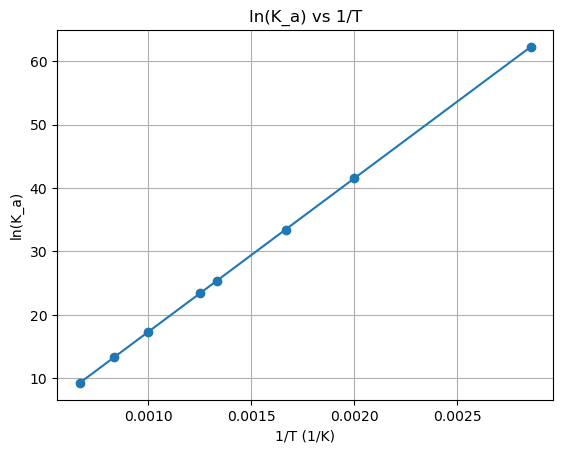

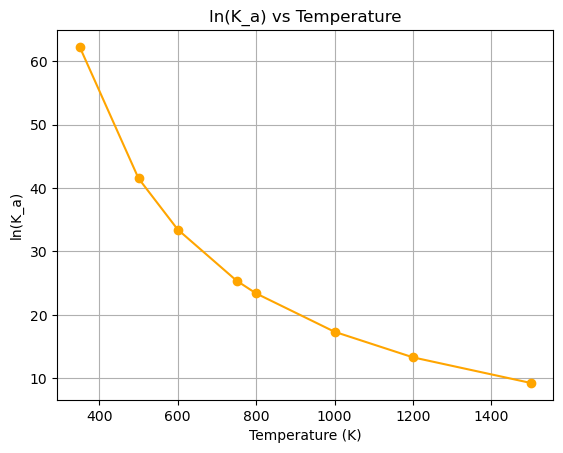

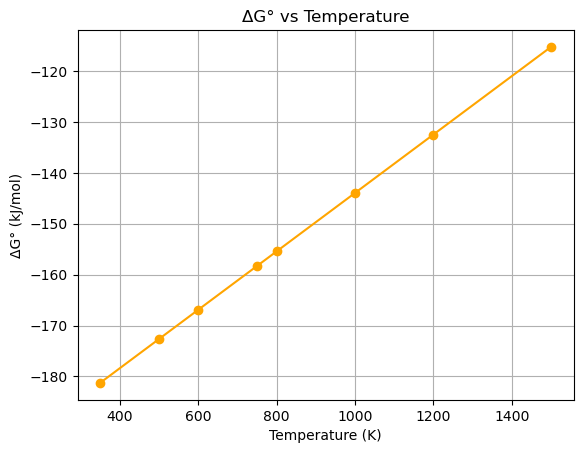

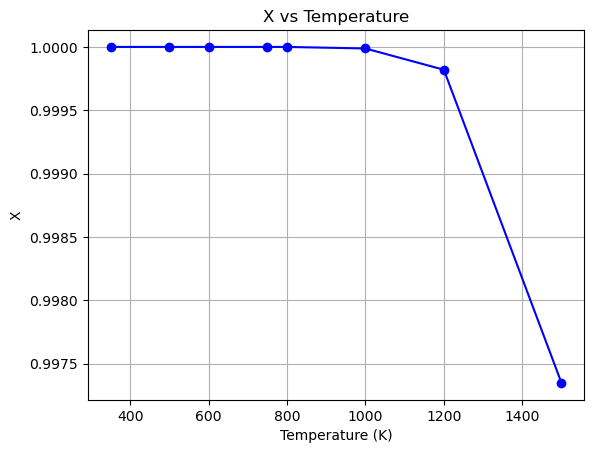

In [24]:
utl.graphs(results)